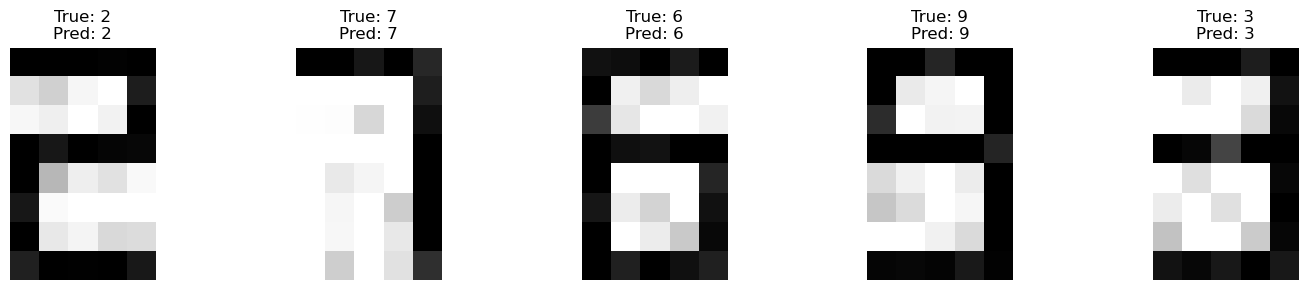


Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


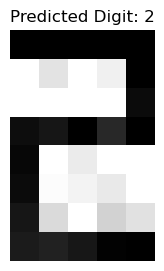


Recognized digit: 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

# Create digit templates
def create_digit_templates():
    templates = {
        0: np.array([
            [1,1,1,1,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1]
        ]),
        1: np.array([
            [0,0,1,0,0],
            [0,1,1,0,0],
            [0,0,1,0,0],
            [0,0,1,0,0],
            [0,0,1,0,0],
            [0,0,1,0,0],
            [0,0,1,0,0],
            [0,1,1,1,0]
        ]),
        2: np.array([
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,1,1,1,1],
            [1,0,0,0,0],
            [1,0,0,0,0],
            [1,0,0,0,0],
            [1,1,1,1,1]
        ]),
        3: np.array([
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,1,1,1,1]
        ]),
        4: np.array([
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1]
        ]),
        5: np.array([
            [1,1,1,1,1],
            [1,0,0,0,0],
            [1,0,0,0,0],
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,1,1,1,1]
        ]),
        6: np.array([
            [1,1,1,1,1],
            [1,0,0,0,0],
            [1,0,0,0,0],
            [1,1,1,1,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1]
        ]),
        7: np.array([
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1]
        ]),
        8: np.array([
            [1,1,1,1,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1]
        ]),
        9: np.array([
            [1,1,1,1,1],
            [1,0,0,0,1],
            [1,0,0,0,1],
            [1,1,1,1,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,1,1,1,1]
        ])
    }
    return templates

# Generate training data with variations
def generate_training_samples(templates, samples_per_class=5, noise_level=0.1):
    X_train = []
    y_train = []

    for digit, template in templates.items():
        for _ in range(samples_per_class):
            noisy_sample = template + np.random.normal(0, noise_level, template.shape)
            noisy_sample = np.clip(noisy_sample, 0, 1)
            X_train.append(noisy_sample.flatten())
            y_train.append(digit)

    return np.array(X_train), np.array(y_train)

# Generate and split the dataset
templates = create_digit_templates()
X, y = generate_training_samples(templates)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Visualize some test predictions
def plot_predictions(X_test, y_test, y_pred, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(X_test[i].reshape(8, 5), cmap='binary')
        axes[i].set_title(f'True: {y_test[i]}\nPred: {y_pred[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Make predictions and visualize results
y_pred = knn.predict(X_test)
plot_predictions(X_test, y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Function to recognize new digits
def recognize_digit(image, knn_classifier):
    features = image.flatten()
    prediction = knn_classifier.predict([features])[0]

    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='binary')
    plt.title(f'Predicted Digit: {prediction}')
    plt.axis('off')
    plt.show()

    return prediction

# Example: Test with a noisy version of digit 2
test_digit = templates[2] + np.random.normal(0, 0.1, templates[2].shape)
test_digit = np.clip(test_digit, 0, 1)
recognized_digit = recognize_digit(test_digit, knn)
print(f"\nRecognized digit: {recognized_digit}")